# Проект: Исследование стартапов

- Автор: Щербань Сергей
- Дата: 25.07.2025

## Цель и задачи

**Цель:** Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.   

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - определить, по каким столбцам можно объединять данные из разных таблиц для целей заказчика;
    - можно ли доверять данным о сотрудниках стартапов и их образовании;
    - исследовать компании, которые были проданы за ноль или за один доллар;
    - какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
    - как рассчитать и отобразить численные показатели и динамику.
4. Сформулировать выводы по проведённому анализу.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Проект направлен на разработку модели бизнеса, для этого проводится исследование исторических данных на предмет полезности исходных датасетов. В процессе работы ожидается выявление показателей и признаков, которые указывают на повышенную вероятность успешной сделки по покупке компании.

Для анализа поступили следующие файлов:

`acquisition.csv` - содержит информацию о покупках одними компаниями других компаний
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

`company_and_rounds.csv` - содержит информацию о компаниях и раундах финансирования
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

`people.csv` - содержит информацию о сотрудниках
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

`education.csv` - содержит информацию об образовании сотрудника
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

`degrees.csv` - содержит информацию о типе образования сотрудника
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

Опциональные датасеты:

`fund.csv` - содержит информацию о фондах
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

`investment.csv` - содержит информацию о раундах инвестирования
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

Они находятся в папке datasets по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузим все данные по проекту.
- Проверим названия столбцов.
- Выведим информацию, которая необходима для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import re

# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno

# Загружаем библиотеки для визуализации данных
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Загружаем модуль, который позволяет отображать различные типы данных
from IPython.display import display

import missingno

from scipy.stats import mode

In [2]:
# Выгружаем данные в переменные
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [3]:
# Выводим основную информацию
print("Выводим основную информацию о: \n                              acquisition_df")
acquisition_df.info()
print("\nВыводим основную информацию о: \n                              company_and_rounds_df")
company_and_rounds_df.info()
print("\nВыводим основную информацию о: \n                              people_df")
people_df.info()
print("\nВыводим основную информацию о: \n                              education_df")
education_df.info()
print("\nВыводим основную информацию о: \n                              degrees_df")
degrees_df.info()
print("\nВыводим основную информацию о: \n                              fund_df")
fund_df.info()
print("\nВыводим основную информацию о: \n                              investment_df")
investment_df.info()

Выводим основную информацию о: 
,                              acquisition_df
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 9407 entries, 0 to 9406
,Data columns (total 6 columns):
, #   Column                Non-Null Count  Dtype 
,---  ------                --------------  ----- 
, 0   id                    9407 non-null   int64 
, 1   acquiring_company_id  9407 non-null   int64 
, 2   acquired_company_id   9407 non-null   int64 
, 3   term_code             1831 non-null   object
, 4   price_amount          9407 non-null   int64 
, 5   acquired_at           9378 non-null   object
,dtypes: int64(4), object(2)
,memory usage: 441.1+ KB
,
,Выводим основную информацию о: 
,                              company_and_rounds_df
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 217774 entries, 0 to 217773
,Data columns (total 22 columns):
, #   Column                 Non-Null Count   Dtype  
,---  ------                 --------------   -----  
, 0   company  ID            217472 non-n

In [4]:
# Изменим дублирующийся столбец в company_and_rounds_df 
# (хотел объединить id, но в Задании 3 Шаг 2.1 написано "без предобработки", значит позже)
company_and_rounds_df = company_and_rounds_df.rename(columns={'company  id': 'company  id scnd'})

In [5]:
company_and_rounds_df

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id scnd,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


In [6]:
# Создадим функцию для преобразования имени столбца в snake_case
def to_snake_case(name):
    return re.sub(r'\s+', '_', name.lower())

# Примененим функцию к названиям столбцов
acquisition_df.columns = acquisition_df.columns.map(to_snake_case)
company_and_rounds_df.columns = company_and_rounds_df.columns.map(to_snake_case)
people_df.columns = people_df.columns.map(to_snake_case)
education_df.columns = education_df.columns.map(to_snake_case)
degrees_df.columns = degrees_df.columns.map(to_snake_case)
fund_df.columns = fund_df.columns.map(to_snake_case)
investment_df.columns = investment_df.columns.map(to_snake_case)

In [7]:
# Создадим функцию для создания сводных таблиц по датафреймам
def create_summary_table(df):
    # Подсчитываем количество строк
    num_rows = len(df)

    # Получаем количество пропусков в каждом столбце
    missing_count = df.isna().sum()

    # Вычисляем процент пропусков для каждого столбца
    missing_percent = df.isna().mean() * 100
    missing_percent_rounded = missing_percent.round(2)

    # Получаем типы данных каждого столбца
    data_types = df.dtypes

    # Собираем сводную таблицу
    summary_table = pd.DataFrame({
        'Количество строк': num_rows,
        'Пропуски': missing_count,
        'Процент пропусков': missing_percent_rounded,
        'Тип данных': data_types
    })

    return summary_table

# Используем функции для датафреймов
summary_table_acquisition_df = create_summary_table(acquisition_df)
summary_table_company_and_rounds_df = create_summary_table(company_and_rounds_df)
summary_table_people_df = create_summary_table(people_df)
summary_table_education_df = create_summary_table(education_df)
summary_table_degrees_df = create_summary_table(degrees_df)
summary_table_fund_df = create_summary_table(fund_df)
summary_table_investment_df = create_summary_table(investment_df)

In [8]:
# Выводим сводную информацию и первые строки
display(summary_table_acquisition_df)
acquisition_df.head()

,Количество строк,Пропуски,Процент пропусков,Тип данных
id,9407,0,0.00,int64
acquiring_company_id,9407,0,0.00,int64
acquired_company_id,9407,0,0.00,int64
term_code,9407,7576,80.54,object
price_amount,9407,0,0.00,int64
acquired_at,9407,29,0.31,object


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Датафрейм `acquisition_df` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний. Названия столбцов имеют общий вид snake_case, а значения в столбцах соответствуют своему описанию.

Пропуски в `term_code` (варианты расчёта) не заполнить, и строки с ними не удалить. Формат `acquired_at` (дата сделки) можно заранее привести к `datetime`. Остальные данные в `acquisition_df` остаются в исходном виде и не требуют обработки.

In [9]:
# Выводим сводную информацию и первые строки
display(summary_table_company_and_rounds_df)
company_and_rounds_df.head()

,Количество строк,Пропуски,Процент пропусков,Тип данных
company_id,217774,302,0.14,float64
name,217774,302,0.14,object
category_code,217774,73888,33.93,object
status,217774,302,0.14,object
founded_at,217774,107818,49.51,object
closed_at,217774,214325,98.42,object
domain,217774,70615,32.43,object
network_username,217774,122240,56.13,object
country_code,217774,109167,50.13,object
investment_rounds,217774,302,0.14,float64


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_scnd,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Датафрейм `company_and_rounds_df` содержит 22 столбца и 217774 строки, в которых представлена информация о компаниях и раундах финансирования. Названия столбцов имеют общий вид snake_case, а значения в столбцах соответствуют своему описанию.
- Столбец `company_id` дополним из `company_id_scnd` чтобы исключить пропуски и приведем к целочисленному формату. 
- Столбец `name` - пропущено 302 названия компании - обезличеные данные не информативны (так же пропуски в `company_id`, `status` и т.д.) - удалим.
- Столбцы с датами `founded_at`, `closed_at` и `funded_at` можно заранее привести к `datetime`.
- Столбцы `investment_rounds`, `funding_rounds`, `funding_total`, `milestones`, `funding_round_id`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round` - привести к целочисленному формату не получится из-за пропусков, необходимость заменить пропуски на значение индикатор пока нет.
- Остальные данные в `company_and_rounds_df` остаются в исходном виде.

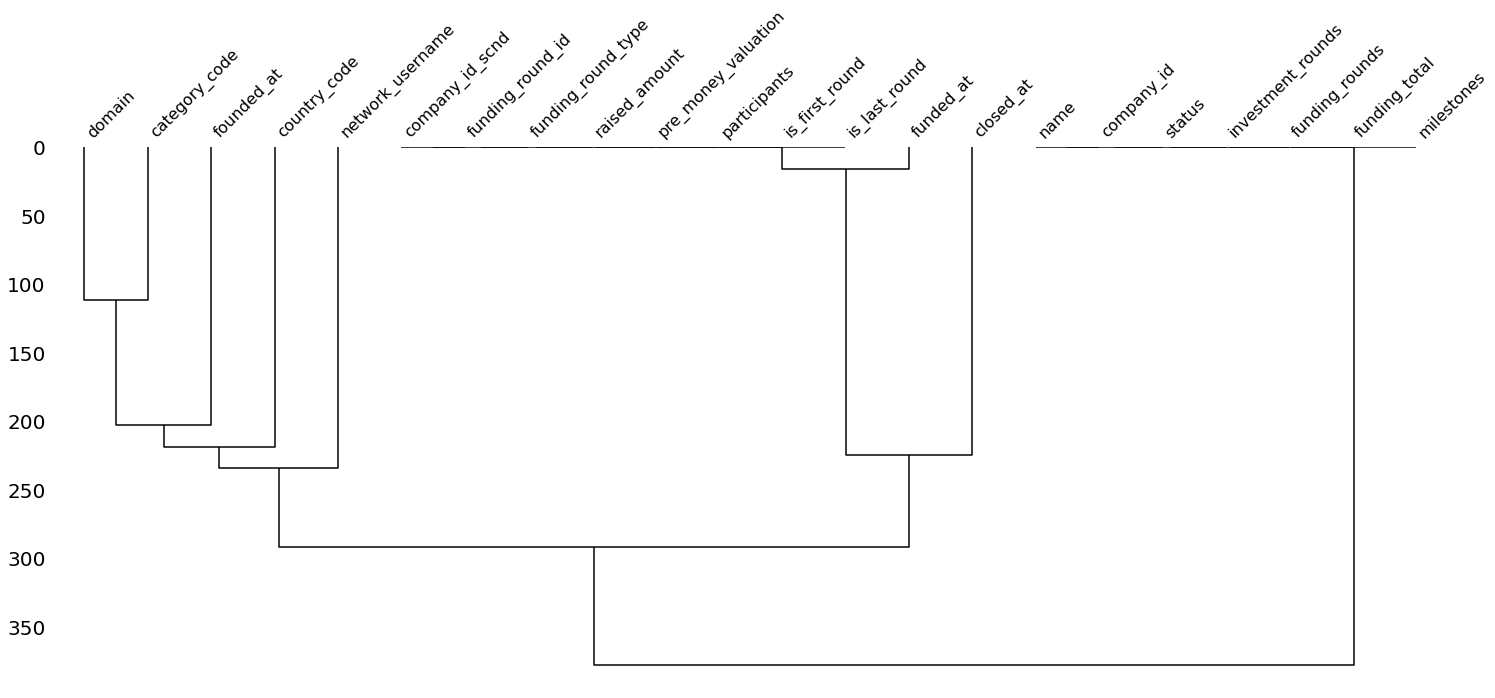

In [10]:
# Код ревьюера
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
msno.dendrogram(company_and_rounds_df)
plt.show()

In [11]:
# Выводим сводную информацию и первые строки
display(summary_table_people_df)
people_df.head()

,Количество строк,Пропуски,Процент пропусков,Тип данных
id,226709,0,0.00,int64
first_name,226709,5,0.00,object
last_name,226709,1,0.00,object
company_id,226709,192094,84.73,float64
network_username,226709,187842,82.86,object


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датафрейм `people_df` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках.
Пропуски в `company_id` (идентификатор компании) не заполнить, и строки с ними не удалить. Остальные данные в `people_df` остаются в исходном виде и не требуют обработки.

In [12]:
# Выводим сводную информацию и первые строки
display(summary_table_education_df)
education_df.head()

,Количество строк,Пропуски,Процент пропусков,Тип данных
id,109610,0,0.00,int64
person_id,109610,0,0.00,int64
instituition,109610,55,0.05,object
graduated_at,109610,51556,47.04,object


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Датафрейм `education_df` содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудника.
Пропуски в `instituition` (название учебного заведения) и `graduated_at` (дата получения образования) не заполнить, и строки с ними не удалить (`graduated_at` привести к `datetime`). Остальные данные в `education_df` остаются в исходном виде и не требуют обработки.

In [13]:
# Выводим сводную информацию и первые строки
display(summary_table_degrees_df)
degrees_df.head()

,Количество строк,Пропуски,Процент пропусков,Тип данных
id,109610,0,0.00,int64
object_id,109610,0,0.00,object
degree_type,109610,11218,10.23,object
subject,109610,28312,25.83,object


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Датафрейм `degrees_df` содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника.
Данные в `object_id` изменить следующим образом - удалить "p:", чтобы иметь общий вид с идентификатором работника из `education_df`. Пропуски в `degree_type` (тип образования) и `subject` (специальность) не заполнить, и строки с ними не удалить. Остальные данные в `degrees_df` остаются в исходном виде и не требуют обработки.

In [14]:
# Выводим сводную информацию и первые строки
display(summary_table_fund_df)
fund_df.head()

,Количество строк,Пропуски,Процент пропусков,Тип данных
id,11652,0,0.00,int64
name,11652,2,0.02,object
founded_at,11652,7047,60.48,object
domain,11652,4290,36.82,object
network_username,11652,9503,81.56,object
country_code,11652,4599,39.47,object
investment_rounds,11652,0,0.00,int64
invested_companies,11652,0,0.00,int64
milestones,11652,0,0.00,int64


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


Датафрейм `fund_df` содержит 9 столбцов и 11652 строки, в которых представлена информация о фондах.
Пропуски не заполнить, и строки с ними не удалить.
Формат `founded_at` (дата создания фонда) можно заранее привести к `datetime`.
Остальные данные в `fund_df` остаются в исходном виде и не требуют обработки.

In [15]:
# Выводим сводную информацию и первые строки
display(summary_table_investment_df)
investment_df.head()

,Количество строк,Пропуски,Процент пропусков,Тип данных
id,61403,0,0.0,int64
funding_round_id,61403,0,0.0,int64
company_id,61403,0,0.0,int64
fund_id,61403,0,0.0,int64


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Датафрейм `investment_df` содержит 4 столбца и 61403 строки, в которых представлена информация о раундах инвестирования.
Пропусков нет, данные соответствуют названиям столбцов.

In [16]:
# Создадим функцию для проверки дублей
def check_duplicates(df):
    duplicates = df[df.duplicated()]
    if duplicates.empty:
        return "Дубликатов не обнаружено."
    else:
        return duplicates

# Проверка наличия дубликатов в каждом из датафреймов
summary_duplicates_acquisition_df = check_duplicates(acquisition_df)
summary_duplicates_company_and_rounds_df = check_duplicates(company_and_rounds_df)
summary_duplicates_people_df = check_duplicates(people_df)
summary_duplicates_education_df = check_duplicates(education_df)
summary_duplicates_degrees_df = check_duplicates(degrees_df)
summary_duplicates_fund_df = check_duplicates(fund_df)
summary_duplicates_investment_df = check_duplicates(investment_df)

# Отобразим результат
print("Дубликаты в acquisition_df:")
print(summary_duplicates_acquisition_df)
print("\nДубликаты в company_and_rounds_df:")
print(summary_duplicates_company_and_rounds_df)
print("\nДубликаты в people_df:")
print(summary_duplicates_people_df)
print("\nДубликаты в education_df:")
print(summary_duplicates_education_df)
print("\nДубликаты в degrees_df:")
print(summary_duplicates_degrees_df)
print("\nДубликаты в fund_df:")
print(summary_duplicates_fund_df)
print("\nДубликаты в investment_df:")
print(summary_duplicates_investment_df)


Дубликаты в acquisition_df:
,Дубликатов не обнаружено.
,
,Дубликаты в company_and_rounds_df:
,Дубликатов не обнаружено.
,
,Дубликаты в people_df:
,Дубликатов не обнаружено.
,
,Дубликаты в education_df:
,Дубликатов не обнаружено.
,
,Дубликаты в degrees_df:
,Дубликатов не обнаружено.
,
,Дубликаты в fund_df:
,Дубликатов не обнаружено.
,
,Дубликаты в investment_df:
,Дубликатов не обнаружено.


В датафреймах нет полных дубликатов строк.

### 1.2. Смена типов и анализ пропусков

- Обработаем типы данных в столбцах, которые хранят значения даты и времени.
- Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

In [17]:
# Обработаем типы данных в столбцах, которые хранят значения даты и времени
def convert_datetime_columns(df):
    for col in df.columns:
        if col.endswith('_at'):
            df[col] = pd.to_datetime(df[col])
    return df

# Применим функции к датафреймам
acquisition_df = convert_datetime_columns(acquisition_df)
company_and_rounds_df = convert_datetime_columns(company_and_rounds_df)
education_df = convert_datetime_columns(education_df)
fund_df = convert_datetime_columns(fund_df)


In [18]:
# Создадим цикл для понижения разрядности
def reduce_precision(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            min_vali = df[col].min()
            max_vali = df[col].max()
            if min_vali >= -2147483648 and max_vali <= 2147483647:
                df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            min_valf = df[col].min()
            max_valf = df[col].max()
            if pd.notnull(min_valf) and pd.notnull(max_valf):
                if min_valf > -3.4e+38 and max_valf < 3.4e+38:
                    df[col] = df[col].astype('float32')
    return df

# Применением функции к датафреймам
acquisition_df = reduce_precision(acquisition_df)
company_and_rounds_df = reduce_precision(company_and_rounds_df)
people_df = reduce_precision(people_df)
education_df = reduce_precision(education_df)
degrees_df = reduce_precision(degrees_df)
fund_df = reduce_precision(fund_df)
investment_df = reduce_precision(investment_df)

In [19]:
# Оценим полноту данных
процент_пропусков1 = acquisition_df.isnull().mean().mean() * 100
print(f"Общий процент пропусков в acquisition_df: {процент_пропусков1:.2f}%")
процент_пропусков2 = company_and_rounds_df.isnull().mean().mean() * 100
print(f"Общий процент пропусков в company_and_rounds_df: {процент_пропусков2:.2f}%")
процент_пропусков3 = people_df.isnull().mean().mean() * 100
print(f"Общий процент пропусков в people_df: {процент_пропусков3:.2f}%")
процент_пропусков4 = education_df.isnull().mean().mean() * 100
print(f"Общий процент пропусков в education_df: {процент_пропусков4:.2f}%")
процент_пропусков5 = degrees_df.isnull().mean().mean() * 100
print(f"Общий процент пропусков в degrees_df: {процент_пропусков5:.2f}%")
процент_пропусков6 = fund_df.isnull().mean().mean() * 100
print(f"Общий процент пропусков в fund_df: {процент_пропусков6:.2f}%")
процент_пропусков7 = investment_df.isnull().mean().mean() * 100
print(f"Общий процент пропусков в investment_df: {процент_пропусков7:.2f}%")


Общий процент пропусков в acquisition_df: 13.47%
,Общий процент пропусков в company_and_rounds_df: 45.59%
,Общий процент пропусков в people_df: 33.52%
,Общий процент пропусков в education_df: 11.77%
,Общий процент пропусков в degrees_df: 9.02%
,Общий процент пропусков в fund_df: 24.26%
,Общий процент пропусков в investment_df: 0.00%


Пропуски в данных варьируются от 0 % до 47%. В столбцах, необходимых для анализа, процент может достигать и больших значений (например для `raised_amount` из `company_and_rounds.csv` - 76%). 

Данные неполны, поэтому будем аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответим на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [20]:
# Создадим новый столбец с датой используя столбец 'funded_at' 
company_and_rounds_df['funding_year'] = pd.to_datetime(company_and_rounds_df['funded_at']).dt.year

# Определяем границы для выбросов
Q1 = company_and_rounds_df['raised_amount'].quantile(0.25)
Q3 = company_and_rounds_df['raised_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, исключая выбросы
filter_c_a_r_df = company_and_rounds_df[(company_and_rounds_df['raised_amount'] >= lower_bound) & 
                                             (company_and_rounds_df['raised_amount'] <= upper_bound)]

# Теперь продолжаем с группировкой и расчётом метрик
funding_table = filter_c_a_r_df.groupby('funding_year')['raised_amount'].agg(['mean', 'count']).reset_index()
funding_table.columns = ['Год', 'Типичный размер средств', 'Количество раундов']

# Фильтруем таблицу, оставляя только те года, для которых количество раундов больше 50
funding_table = funding_table[funding_table['Количество раундов'] > 50]

# Сброс индекса после фильтрации
funding_table = funding_table.reset_index(drop=True)

# Форматируем столбцы для удобного чтения
funding_table['Типичный размер средств'] = funding_table['Типичный размер средств'].apply(lambda x: f'{x:,.0f}')
funding_table['Год'] = funding_table['Год'].astype(int)

display(funding_table)


,Год,Типичный размер средств,Количество раундов
0,1999,"3,026,744",65
1,2000,"3,924,374",98
2,2001,"3,284,289",79
3,2002,"4,139,171",105
4,2003,"3,735,314",146
5,2004,"4,845,794",265
6,2005,"5,524,238",1453
7,2006,"4,965,352",2126
8,2007,"4,177,592",2844
9,2008,"3,832,758",3236


В 2005 году типичный размер собранных в рамках одного раунда средств был максимален.

In [21]:
# Форматируем столбец для построения графика
funding_table['Типичный размер средств'] = funding_table['Типичный размер средств'].str.replace(',', '').astype(int)

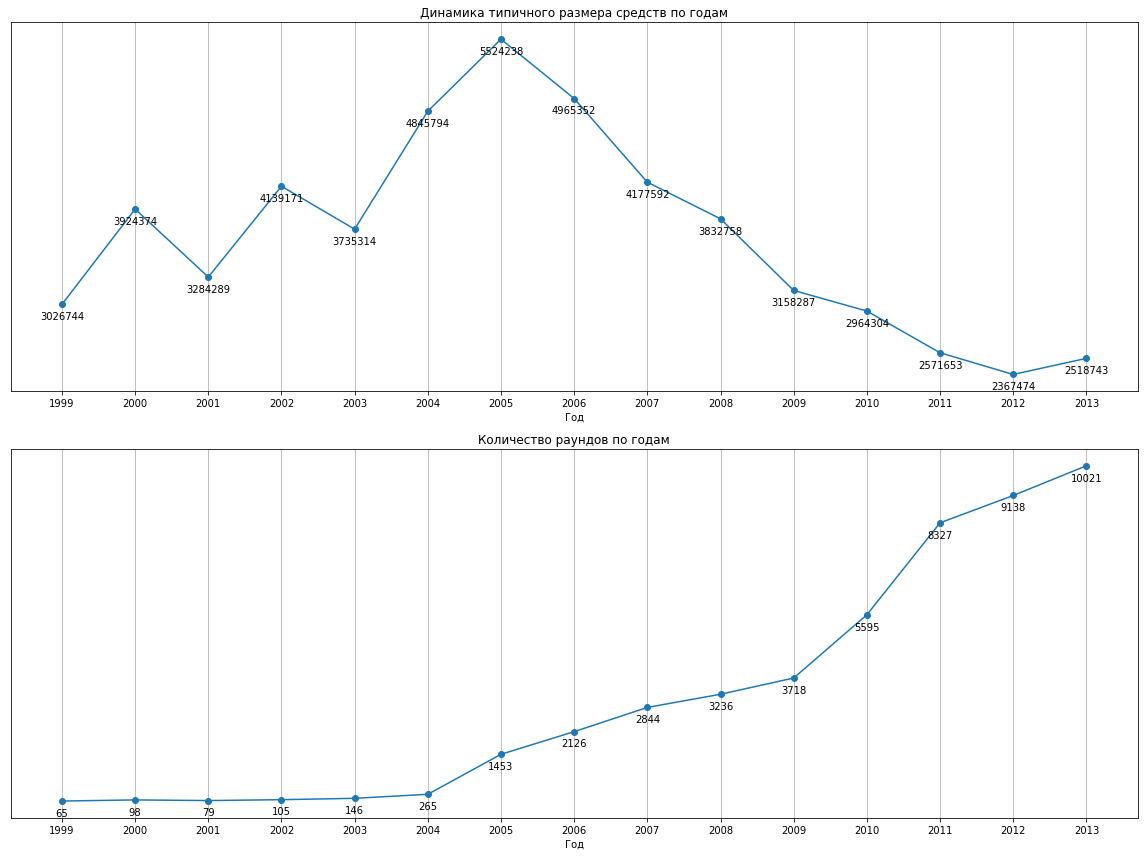

In [22]:
# Создаем фигуру и два подграфика
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Первый подграфик: типичный размер средств
ax1.plot(funding_table['Год'], funding_table['Типичный размер средств'], marker='o')
ax1.set_title('Динамика типичного размера средств по годам')
ax1.set_xlabel('Год')
ax1.set_ylabel('Типичный размер средств')
ax1.grid(True)

# Добавление аннотаций со значениями
for i, (year, value) in enumerate(zip(funding_table['Год'], funding_table['Типичный размер средств'])):
    ax1.annotate(f'{value}',
                 xy=(year, value),
                 xytext=(0, -7),
                 textcoords='offset points',
                 ha='center', va='top')

# Скрываем ось Y
ax1.yaxis.set_visible(False)

# Устанавливаем все значения 'Год' на оси X
ax1.set_xticks(funding_table['Год'])

# Второй подграфик: количество раундов
ax2.plot(funding_table['Год'], funding_table['Количество раундов'], marker='o')
ax2.set_title('Количество раундов по годам')
ax2.set_xlabel('Год')
ax2.set_ylabel('Количество раундов')
ax2.grid(True)

# Добавляем аннотации для второго графика
for i, (year, value) in enumerate(zip(funding_table['Год'], funding_table['Количество раундов'])):
    ax2.annotate(f'{value}',
                 xy=(year, value),
                 xytext=(0, -7),
                 textcoords='offset points',
                 ha='center', va='top')

# Скрываем ось Y для второго графика
ax2.yaxis.set_visible(False)
# Устанавливаем все значения 'Год' на оси X
ax2.set_xticks(funding_table['Год'])

plt.tight_layout()
plt.show()

К 2013 году тенденция по количеству раундов увеличивалась из года в год. Так в 2001 количество раундов было 79, а в 2013 уже 10021 раунда. 

В то же время, динамика выделяемых средств в рамках каждого раунда постоянно уменьшалась, но после продолжительного падения 2005-2012 немного увеличилась и на момент 2013 имеет точку роста.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуем выбранные границы групп.
- Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Для выполнения задания возможно присоединить к основным таблицам ещё и таблицу `degrees.csv`. Для этого сначала объединим ее с `education.csv`, а полученный результат добавим к `people.csv`.

In [23]:
# Объединяем данные из двух датасетов по идентификатору записи
merged_de_ed_df = degrees_df.merge(education_df, on='id', how='inner')

# Объединяем filtered_people_df с merged_de_ed_df
merged_merged_df = people_df.merge(merged_de_ed_df, left_on='id', right_on='person_id', how='left')

In [24]:
# Определяем количество сотрудников в каждой компании
company_sizes = merged_merged_df.groupby('company_id').size().reset_index(name='count')

# Применяем метод qcut для разделения компаний на квантили с удалением дубликатов
company_sizes['quantiles'] = pd.qcut(company_sizes['count'], q=4, duplicates='drop')  # Разделение на 4 квантиля

# Посчитаем min и max сотрудников в компаниях
min_employees = company_sizes['count'].min()
max_employees = company_sizes['count'].max()
print(f"Минимальное количество сотрудников: {min_employees}")
print(f"Максимальное количество сотрудников: {max_employees}")

# Считаем количество компаний
number_of_company = company_sizes['company_id'].size
print(f"Количество компаний: {number_of_company}")


Минимальное количество сотрудников: 1
,Максимальное количество сотрудников: 376
,Количество компаний: 22922


In [25]:
# Определяем количество сотрудников в каждой компании
first_company_sizes = merged_merged_df.groupby('company_id').size().reset_index(name='count')

# Разделяем компании на группы по количеству сотрудников
first_bins = [0, 1, 2, 3, np.inf]
first_labels = ['1 сотрудник', '2 сотрудника', '3 сотрудника', '4 и более сотрудников']
first_company_sizes['Группы'] = pd.cut(first_company_sizes['count'], bins=first_bins, labels=first_labels)

# Оцениваем среднюю долю сотрудников без информации об образовании в каждой группе
first_avg_unknown_education = merged_merged_df['instituition'].isnull().groupby(merged_merged_df['company_id']).mean().reset_index()
first_result = first_company_sizes.merge(first_avg_unknown_education, on='company_id')

# Добавляем количество компаний в каждую группу
first_result = first_result.groupby('Группы').agg({'instituition': 'mean', 'company_id': 'size'})

# Переименовываем столбцы
first_result = first_result.rename(columns={'instituition': 'missing_education_ratio', 'company_id': 'count_company'})
first_result['missing_education_ratio'] = first_result['missing_education_ratio'].round(2)

display(first_result)

,missing_education_ratio,count_company
Группы,,
1 сотрудник,0.59,14150
2 сотрудника,0.23,4735
3 сотрудника,0.23,1857
4 и более сотрудников,0.29,2180


Из 22922 организаций 1-3 сотрудника у 90% компаний, а 60% - компании из 1 сотрудника.

Полнота сведений о сотрудниках размер компании которой больше чем "1 сотрудник" в 2 раза больше чем в компаниях из 1 человека. Это может говорить о том, что большое количество компаний состоящих из 1 сотрудника основывают люди без образования.
- Так для 2180 компаний, где количество сотрудников больше 4, без информации об образовании 29%.
- Для 1857 компаний, где количество сотрудников 3, без информации об образовании 23%.
- А у 4735 компаний, где количество сотрудников 2, без информации об образовании 23%.
- И в 14150 компаниях, где количество сотрудников 1, без информации об образовании 59%.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбцы с именем `network_username` содержится в датафреймах `company_and_rounds_df`, `people_df` и `fund_df`. При этом в `company_and_rounds_df` 56% пропусков в столбце `network_username`, в `people_df` - 82%, а в `fund_df` - 81%. Проверим их на совпадения.

In [26]:
# Убираем строки с пустыми значениями в столбце network_username
search_people_df = people_df[people_df['network_username'].notnull()]
search_company_and_rounds_df = company_and_rounds_df[company_and_rounds_df['network_username'].notnull()]
search_fund_df = fund_df[fund_df['network_username'].notnull()]

# Проверяем совпадения
matches_df1 = search_people_df[search_people_df['network_username'].isin(search_company_and_rounds_df['network_username'])]
matches_df2 = search_company_and_rounds_df[search_company_and_rounds_df['network_username'].isin(search_people_df['network_username'])]
matches_df3 = search_fund_df[search_fund_df['network_username'].isin(search_people_df['network_username'])]
matches_df4 = search_fund_df[search_fund_df['network_username'].isin(search_company_and_rounds_df['network_username'])]

# Отображаем совпадения network_username и считаем их количество в people_df
username_counts1 = matches_df1['network_username'].value_counts()
display(username_counts1)

iWatchLife        6
ConnectAndSell    4
firstscribe       4
weareqipp         3
gmrweb123         3
                 ..
4evervogue        1
geniot            1
spothero          1
FierceHound       1
timesofnet        1
Name: network_username, Length: 2199, dtype: int64

Первая проверка совпадений между `network_username` в `company_and_rounds_df` и `people_df` показала 305 одинаковых ников. Значения не уникальны и есть повторы, проверим как они выглядят.

In [27]:
# Проверяем совпадения по firstscribe
filtered_rows1 = company_and_rounds_df[company_and_rounds_df['network_username'] == 'firstscribe']
filtered_rows2 = people_df[people_df['network_username'] == 'firstscribe']
display(filtered_rows1)
display(filtered_rows2)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_scnd,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funding_year
159846,35489.0,First Scribe Inc.,other,operating,1993-01-01,NaT,firstscribe.com,firstscribe,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,first_name,last_name,company_id,network_username
175076,45528,Jay,Perrill,NaN,firstscribe
175149,45600,Rob,Wagner,35489.0,firstscribe
175150,45601,Jason,Barney,35489.0,firstscribe
175151,45602,Dan,Epley,35489.0,firstscribe


По примеру видно, что на один `network_username`=`irstscribe` из `company_and_rounds_df` приходится 4 никнейма в `people_df`, у всех разные имена, даже есть пропуск в `company_id`, чтобы удостовериться что они имеют что-то общее.

Дополнительно преверим обратное пересечение.

In [28]:
# Проверяем совпадения
username_counts2 = matches_df2['network_username'].value_counts()
display(username_counts2)

network            13
crowdgather         8
pogoplug            7
mktxr               6
71lbs               6
                   ..
thawesomeboston     1
TaglineMachine      1
gcrocker            1
pearsontech         1
timesofnet          1
Name: network_username, Length: 2199, dtype: int64

Значения не уникальны и есть повторы, проверим как они выглядят.

In [29]:
# Проверяем совпадения по network_username и считаем их количество в company_and_rounds_df
filtered_rows3 = company_and_rounds_df[company_and_rounds_df['network_username'] == 'network']
filtered_rows4 = people_df[people_df['network_username'] == 'network']
display(filtered_rows3)
display(filtered_rows4)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_scnd,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funding_year
146858,28065.0,Talentica,software,operating,NaT,NaT,talentica.com,network,IND,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217297,12.0,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.0,...,261.0,12.0,2007-07-01,series-a,5000000.0,20000000.0,10.0,0.0,1.0,2007.0
217298,12.0,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.0,...,2106.0,12.0,2008-05-01,series-b,15000000.0,0.0,6.0,0.0,0.0,2008.0
217299,12.0,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.0,...,5082.0,12.0,2009-02-13,series-c+,35000000.0,0.0,6.0,0.0,0.0,2009.0
217300,12.0,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.0,...,8775.0,12.0,2009-09-25,series-c+,100000000.0,0.0,6.0,0.0,0.0,2009.0
217301,12.0,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.0,...,11042.0,12.0,2010-01-08,series-c+,5166510.0,0.0,0.0,0.0,0.0,2010.0
217302,12.0,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.0,...,20521.0,12.0,2010-12-15,series-c+,200000000.0,0.0,1.0,0.0,0.0,2010.0
217303,12.0,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.0,...,24576.0,12.0,2011-08-02,series-c+,400000000.0,0.0,5.0,0.0,0.0,2011.0
217304,12.0,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.0,...,25254.0,12.0,2011-09-08,other,400000000.0,0.0,0.0,1.0,0.0,2011.0
217460,150413.0,Infuy,software,operating,2007-01-01,NaT,infuy.com,network,URY,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,first_name,last_name,company_id,network_username
226705,174088,Dr. Ray,Woods,188200.0,network


Здесь определяется следующее, что на один `network_username`=`network` из `people_df` приходится 13 никнеймов в `company_and_rounds_df`, 6 разных `company_id`, что говорит о невозможности объединить таблицы.

Посчитаем процент пересечений между тремя датафреймами.

In [30]:
# Убираем строки с пустыми значениями в столбце network_username
search_company_and_rounds_df = set(company_and_rounds_df['network_username'].dropna().unique())
search_people_df = set(people_df['network_username'].dropna().unique())
search_fund_df = set(fund_df['network_username'].dropna().unique())

# Определяем пересечения множеств
intersection_all_search = len(search_company_and_rounds_df.intersection(search_people_df).intersection(search_fund_df))
intersection_company_people = len(search_company_and_rounds_df.intersection(search_people_df)) - intersection_all_search
intersection_company_fund = len(search_company_and_rounds_df.intersection(search_fund_df)) - intersection_all_search
intersection_people_fund = len(search_people_df.intersection(search_fund_df)) - intersection_all_search

# Рассчитываем общее количество уникальных usernames во всех датафреймах
total_unique_search = len(search_company_and_rounds_df.union(search_people_df).union(search_fund_df))

# Вычисляем проценты
percent_intersection_all_search = (intersection_all_search / total_unique_search) * 100
percent_intersection_company_people = (intersection_company_people / total_unique_search) * 100
percent_intersection_company_fund = (intersection_company_fund / total_unique_search) * 100
percent_intersection_people_fund = (intersection_people_fund / total_unique_search) * 100

print(f"Процент пересечения всех трёх датафреймов: {percent_intersection_all_search:.2f}%")
print(f"Процент пересечения company_and_rounds_df и people_df: {percent_intersection_company_people:.2f}%")
print(f"Процент пересечения company_and_rounds_df и fund_df: {percent_intersection_company_fund:.2f}%")
print(f"Процент пересечения people_df и fund_df: {percent_intersection_people_fund:.2f}%")


Процент пересечения всех трёх датафреймов: 0.01%
,Процент пересечения company_and_rounds_df и people_df: 1.86%
,Процент пересечения company_and_rounds_df и fund_df: 0.05%
,Процент пересечения people_df и fund_df: 0.06%


Подведем итог для столбца `network_username`:
- частота совпадений от 0.05% до 1.86% (в зависимости от проверяемого датафрейма)
- для объединения таблиц `company_and_rounds_df` и `people_df` столбец нельзя использовать, так как ведет к искажению данных.
- таблица `fund_df` так же не может быть использована для объединения.

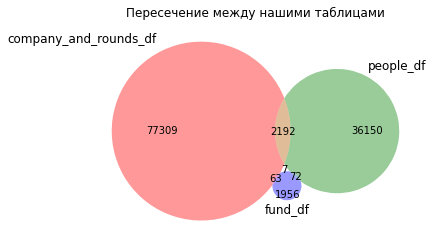

In [31]:
# Код ревьюера
!pip install matplotlib-venn -q
import matplotlib.pyplot as plt
from matplotlib_venn import  venn3

first_id = set(company_and_rounds_df['network_username'].dropna().unique())
second_id = set(people_df['network_username'].dropna().unique())
third_id = set(fund_df['network_username'].dropna().unique())

# Строим диаграмму Венна 
venn3([first_id, second_id, third_id], set_labels=('company_and_rounds_df', 'people_df', 'fund_df'))

plt.title("Пересечение между нашими таблицами")
plt.show()



### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратим внимание на структуру датасета, порядок и названия столбцов, проанализируем значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [32]:
# Заполняем пропущеные идентификаторы компаний в company_and_rounds_df 
company_and_rounds_df['company_id'] = company_and_rounds_df['company_id'].fillna(company_and_rounds_df['company_id_scnd'])

# Преобразуем столбец company_id в тип int
company_and_rounds_df['company_id'] = company_and_rounds_df['company_id'].astype(int)


In [33]:
# Удаляем пропуски из name
company_and_rounds_df = company_and_rounds_df.dropna(subset=['name'])

# Меняем последовательность
new_order = ['company_id', 'name', 'category_code', 'status', 'closed_at', 'funded_at', 
             'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 
             'funding_round_type', 'raised_amount', 'company_id_scnd', 'founded_at', 'investment_rounds', 
             'pre_money_valuation', 'is_first_round', 'is_last_round', 'domain', 
             'network_username', 'country_code', 'participants', 'funding_year']
company_and_rounds_df = company_and_rounds_df[new_order]

# Меняем название столбцов для упрощения навигации
company_and_rounds_df = company_and_rounds_df.rename(columns={
    'name': 'company_name',
    'category_code': 'category',
    'funded_at': 'funding_at',
    'milestones': 'funding_milestones',
    'raised_amount': 'funding_raised_amount',
    'founded_at': 'investment_at'
})

# Проверяем корректность
display(company_and_rounds_df)
finale_summary_table_company_and_rounds_df = create_summary_table(company_and_rounds_df)
display(finale_summary_table_company_and_rounds_df)

,company_id,company_name,category,status,closed_at,funding_at,funding_rounds,funding_total,funding_milestones,funding_round_id,...,investment_at,investment_rounds,pre_money_valuation,is_first_round,is_last_round,domain,network_username,country_code,participants,funding_year
0,1,Wetpaint,web,operating,NaT,2005-10-01,3.0,39750000.0,5.0,888.0,...,2005-10-17,0.0,0.0,0.0,1.0,wetpaint-inc.com,BachelrWetpaint,USA,2.0,2005.0
1,1,Wetpaint,web,operating,NaT,2007-01-01,3.0,39750000.0,5.0,889.0,...,2005-10-17,0.0,0.0,0.0,0.0,wetpaint-inc.com,BachelrWetpaint,USA,3.0,2007.0
2,1,Wetpaint,web,operating,NaT,2008-05-19,3.0,39750000.0,5.0,2312.0,...,2005-10-17,0.0,0.0,1.0,0.0,wetpaint-inc.com,BachelrWetpaint,USA,4.0,2008.0
3,10,Flektor,games_video,acquired,NaT,NaT,0.0,0.0,0.0,NaN,...,NaT,0.0,NaN,NaN,NaN,flektor.com,NaN,USA,NaN,NaN
4,100,There,games_video,acquired,NaT,NaT,0.0,0.0,4.0,NaN,...,NaT,0.0,NaN,NaN,NaN,there.com,NaN,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217467,7748,Flowgram,web,closed,2008-06-11,2008-01-31,1.0,1300000.0,3.0,2836.0,...,2007-06-01,0.0,0.0,1.0,1.0,flowgram.com,network,USA,8.0,2008.0
217468,174536,Pphotonet,games_video,operating,NaT,NaT,0.0,0.0,0.0,NaN,...,2012-05-01,0.0,NaN,NaN,NaN,pPhotonet.co,pPhotonet,NaN,NaN,NaN
217469,43233,Photonet,photo_video,acquired,NaT,2010-03-05,3.0,57500000.0,3.0,12687.0,...,2010-03-01,0.0,0.0,0.0,1.0,Photonet.com,Photonet,USA,2.0,2010.0
217470,43233,Photonet,photo_video,acquired,NaT,2011-02-02,3.0,57500000.0,3.0,21259.0,...,2010-03-01,0.0,0.0,0.0,0.0,Photonet.com,Photonet,USA,5.0,2011.0


,Количество строк,Пропуски,Процент пропусков,Тип данных
company_id,217472,0,0.00,int64
company_name,217472,0,0.00,object
category,217472,73586,33.84,object
status,217472,0,0.00,object
closed_at,217472,214023,98.41,datetime64[ns]
funding_at,217472,165090,75.91,datetime64[ns]
funding_rounds,217472,0,0.00,float32
funding_total,217472,0,0.00,float32
funding_milestones,217472,0,0.00,float32
funding_round_id,217472,164846,75.80,float32


Во время анализа данных датасета `company_and_rounds.csv` была изменена структура, а именно порядок и название столбцов были изменены в соответствии с их важностью и значением. 

Данные в датафрейме `company_and_rounds_df` максимально сохранены. Удалено лишь 0.14% строк, содержащих не информативные данные. 

Теперь продолжим обработку. По словам заказчика, данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом. Подготовим данные для дальнейшего анализа.

In [34]:
# Создаем первый датафрейм df_company
company_df = company_and_rounds_df[['company_id', 'company_name', 'category', 'status', 'investment_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'funding_milestones']]

# Создаем второй датафрейм df_funding
funding_df = company_and_rounds_df[['company_id_scnd', 'funding_at', 'closed_at', 'funding_round_id', 'funding_round_type', 'funding_raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']]


In [35]:
# Проверяем корректность
finale_summary_table_company_df1 = create_summary_table(company_df)
display(finale_summary_table_company_df1)
finale_summary_table_funding_df1 = create_summary_table(funding_df)
display(finale_summary_table_funding_df1)

,Количество строк,Пропуски,Процент пропусков,Тип данных
company_id,217472,0,0.00,int64
company_name,217472,0,0.00,object
category,217472,73586,33.84,object
status,217472,0,0.00,object
investment_at,217472,107516,49.44,datetime64[ns]
domain,217472,70313,32.33,object
network_username,217472,121938,56.07,object
country_code,217472,108865,50.06,object
investment_rounds,217472,0,0.00,float32
funding_rounds,217472,0,0.00,float32


,Количество строк,Пропуски,Процент пропусков,Тип данных
company_id_scnd,217472,164846,75.80,float32
funding_at,217472,165090,75.91,datetime64[ns]
closed_at,217472,214023,98.41,datetime64[ns]
funding_round_id,217472,164846,75.80,float32
funding_round_type,217472,164846,75.80,object
funding_raised_amount,217472,164846,75.80,float32
pre_money_valuation,217472,164846,75.80,float32
participants,217472,164846,75.80,float32
is_first_round,217472,164846,75.80,float32
is_last_round,217472,164846,75.80,float32


In [36]:
# Удаляем дубликаты в company_df
company_df = company_df.drop_duplicates()

# Удаляем дубликаты в funding_df
funding_df = funding_df.drop_duplicates()


In [37]:
# Приводим столбцы к удобному формату
company_df['investment_rounds'] = company_df['investment_rounds'].astype(int)
company_df['funding_rounds'] = company_df['funding_rounds'].astype(int)
company_df['funding_total'] = company_df['funding_total'].astype(int)
company_df['funding_milestones'] = company_df['funding_milestones'].astype(int)

In [38]:
# Проверяем корректность
finale_summary_table_company_df2 = create_summary_table(company_df)
display(finale_summary_table_company_df2)
finale_summary_table_funding_df2 = create_summary_table(funding_df)
display(finale_summary_table_funding_df2)

,Количество строк,Пропуски,Процент пропусков,Тип данных
company_id,196553,0,0.00,int64
company_name,196553,0,0.00,object
category,196553,73367,37.33,object
status,196553,0,0.00,object
investment_at,196553,105326,53.59,datetime64[ns]
domain,196553,70008,35.62,object
network_username,196553,115962,59.00,object
country_code,196553,108563,55.23,object
investment_rounds,196553,0,0.00,int64
funding_rounds,196553,0,0.00,int64


,Количество строк,Пропуски,Процент пропусков,Тип данных
company_id_scnd,52860,234,0.44,float32
funding_at,52860,478,0.90,datetime64[ns]
closed_at,52860,49684,93.99,datetime64[ns]
funding_round_id,52860,234,0.44,float32
funding_round_type,52860,234,0.44,object
funding_raised_amount,52860,234,0.44,float32
pre_money_valuation,52860,234,0.44,float32
participants,52860,234,0.44,float32
is_first_round,52860,234,0.44,float32
is_last_round,52860,234,0.44,float32


Теперь данные имеют лаконичный формат, сохранена связность и компании будет удобно отобрать по параметрам чтобы рассчитать показатели.


## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — оставим только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверим полноту и корректность получившейся таблицы. Далее работаем только с этими данными.

In [39]:
# Фильтруем данные по требуемым условиям
filtered_company_df = company_df[(company_df['funding_rounds']>0)|(company_df['investment_rounds']>0)|(company_df['status'] == 'acquired')]

# Проверяем корректность
summary_table_filtered_company_df = create_summary_table(filtered_company_df)
display(summary_table_filtered_company_df)


,Количество строк,Пропуски,Процент пропусков,Тип данных
company_id,40747,0,0.00,int64
company_name,40747,0,0.00,object
category,40747,5432,13.33,object
status,40747,0,0.00,object
investment_at,40747,12940,31.76,datetime64[ns]
domain,40747,4993,12.25,object
network_username,40747,19897,48.83,object
country_code,40747,6005,14.74,object
investment_rounds,40747,0,0.00,int64
funding_rounds,40747,0,0.00,int64


Создали датафрейм с 40747 компаниями у которых число раундов финансирования и инветиционных раундов больше 0, а так же статус `acquired`.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратим внимание, например, на показатели, возвращаемые методом `.describe()`, — объясним их. Применимы ли к таким данным обычные способы нахождения типичных значений?

Оценим разброс значений финансирования для `funding_total`:

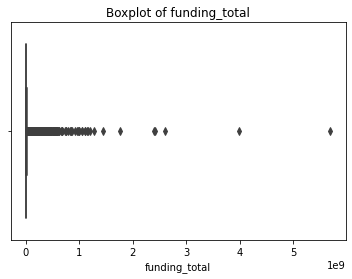

In [40]:
# Построим boxplot с помощью seaborn
sns.boxplot(x=filtered_company_df['funding_total'])
plt.title('Boxplot of funding_total')
plt.xlabel('funding_total')
plt.show()


В данных присутствует информация о очень больших вложениях в компании. Это вполне имеет смысл в контексте изучаемого датафрейма. В финансовых данных выброс может соответствовать необычно крупной инвестиции в направление области деятельности компании. Попробуем связать вложения и категории компаний.

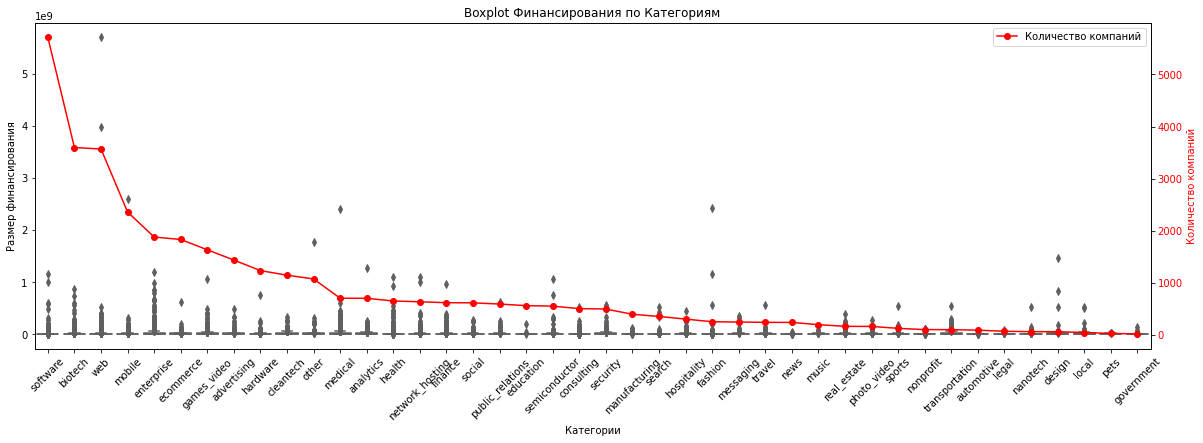

In [41]:
# Создание boxplot
plt.figure(figsize=(20, 6))  # Изменение размера графика
sns.boxplot(x='category', y='funding_total', data=filtered_company_df, palette='Set3')
plt.title('Boxplot Финансирования по Категориям')
plt.xlabel('Категории')
plt.ylabel('Размер финансирования')

# Поворот названий по оси X
plt.xticks(rotation=45)

# Подсчитываем количество значений для каждой категории
category_counts = filtered_company_df['category'].value_counts()

# Создаём вторую ось y
ax2 = plt.gca().twinx()

# Добавляем линию, показывающую количество значений на второй оси
ax2.plot(category_counts.index, category_counts, color='red', marker='o', label='Количество компаний')
ax2.set_ylabel('Количество компаний', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.legend()

plt.show()


Самые большие вложения были направлены на web-разработки (web), а больше всего компаний имеют категорию разработки программного обеспечения (software). Исключение категории или значений из них приведет к большему искажению данных, чем уменьшение количества исследуемых компаний. Оценим статистические показатели финансирования.

In [42]:
# Генерируем статистическое описание данных 
print(filtered_company_df['funding_total'].describe().to_string(float_format='{:.2f}'.format))

# Вычисляем 30/35-й и 85/90-й перцентили
perc_30 = np.percentile(filtered_company_df['funding_total'], 30)
perc_35 = np.percentile(filtered_company_df['funding_total'], 35)
perc_80 = np.percentile(filtered_company_df['funding_total'], 80)
perc_85 = np.percentile(filtered_company_df['funding_total'], 85)

print(f"30-й перцентиль: {perc_30:.2f}")
print(f"35-й перцентиль: {perc_35:.2f}")
print(f"80-й перцентиль: {perc_80:.2f}")
print(f"85-й перцентиль: {perc_85:.2f}")


count        40747.00
,mean      10135609.63
,std       56464359.62
,min              0.00
,25%              0.00
,50%         600000.00
,75%        5650650.00
,max     5699999744.00
,30-й перцентиль: 0.00
,35-й перцентиль: 40000.00
,80-й перцентиль: 8749416.00
,85-й перцентиль: 13227320.00


Более 30% значений `funding_total` - `0`. Компании действительно могли не финансироваться по тем или иным причинам. Но чтобы ответить на вопрос о "типичности" финансирования компаний, исключим из анализа компании без вложений средств.

In [43]:
# Отобразим количество исключенных компаний
count_zeros = (filtered_company_df['funding_total'] == 0).sum()
print(f"Исключено компаний: {count_zeros}")

# Генерируем новое статистическое описание данных 
filtered_clear_company_df = filtered_company_df.loc[filtered_company_df['funding_total'] > 0]
print(filtered_clear_company_df['funding_total'].describe().to_string(float_format='{:.2f}'.format))
perco_clear_15 = np.percentile(filtered_clear_company_df['funding_total'], 15)
perco_clear_85 = np.percentile(filtered_clear_company_df['funding_total'], 85)
print(f"15-й перцентиль: {perco_clear_15:.2f}")
print(f"85-й перцентиль: {perco_clear_85:.2f}")

Исключено компаний: 12873
,count        27874.00
,mean      14816520.26
,std       67759362.69
,min            291.00
,25%         500000.00
,50%        2564500.00
,75%       11000000.00
,max     5699999744.00
,15-й перцентиль: 200000.00
,85-й перцентиль: 21724615.00


Самое минимально вложение - `291`, а максимально превышает `5.5 миллиардов`. Набор данных все еще содержит значительные выбросы и данные распределены относительно неравномерно. Об этом говорит большая разница между средним значением, стандартным отклонением и модой. Сейчас данные группируются не плотно и значения в наборе данных распределены не симметрично.

Продолжим чистку от выбросов. Попробуем определить в каких количественных диапазонах можно получить лучший показатель стандартного отклонения, чтобы при этом количество компаний не упало ниже 18000(45% от изначального объема данных и 65% от компаний с финансированием)

In [44]:
# Создадим датафрейм с фильтром
filtered_dub_clear_company_df = filtered_company_df.loc[filtered_company_df['funding_total'] > 0]

# Ищем диапазон перцентилей для проверки
percentiles_to_check = np.arange(10, 50)

best_std = float('inf')
best_count = 0
best_perc_low = 0
best_perc_high = 0

for low_perc in percentiles_to_check:
    for high_perc in range(low_perc + 10, 101):
        percs_clear_low = np.percentile(filtered_dub_clear_company_df['funding_total'], low_perc)
        percs_clear_high = np.percentile(filtered_dub_clear_company_df['funding_total'], high_perc)

        filtered_no_outliers = filtered_dub_clear_company_df[(filtered_dub_clear_company_df['funding_total'] >= percs_clear_low) & (filtered_dub_clear_company_df['funding_total'] <= percs_clear_high)]

        count = len(filtered_no_outliers)
        std = filtered_no_outliers['funding_total'].std()

        if 18000 <= count <= 28000 and std < best_std:
            best_std = std
            best_count = count
            best_perc_low = low_perc
            best_perc_high = high_perc

print(f"Лучшие значения перцентилей: {best_perc_low}% и {best_perc_high}%")
print(f"Количество компаний в диапазоне: {best_count}")


Лучшие значения перцентилей: 10% и 73%
,Количество компаний в диапазоне: 18133


In [45]:
# Подставляем перцентили
percs_clear_10 = np.percentile(filtered_dub_clear_company_df['funding_total'], 10)
percs_clear_73 = np.percentile(filtered_dub_clear_company_df['funding_total'], 73)

# Фильтруем данные между 10-м и 73-м перцентилями
filtered_not_outliers = filtered_dub_clear_company_df[(filtered_dub_clear_company_df['funding_total'] >= percs_clear_10) & (filtered_dub_clear_company_df['funding_total'] <= percs_clear_73)]

print(filtered_not_outliers['funding_total'].describe().to_string(float_format='{:.2f}'.format))


count      18133.00
,mean     2635876.12
,std      2686423.98
,min       100000.00
,25%       500000.00
,50%      1500000.00
,75%      4000000.00
,max     10000000.00


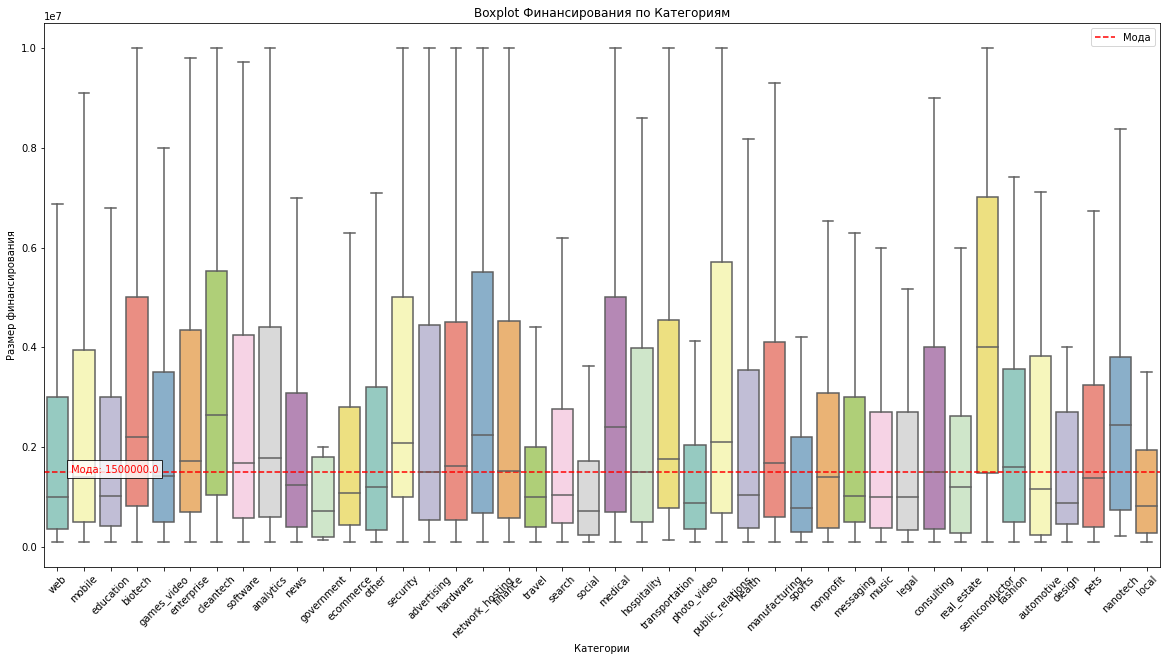

In [46]:
# Вычисляем моду для funding_total
mode_value = np.percentile(filtered_not_outliers['funding_total'], 50)

# Создание boxplot
plt.figure(figsize=(20, 10))  # Изменение размера графика
sns.boxplot(x='category', y='funding_total', data=filtered_not_outliers, palette='Set3', showfliers=False)  
plt.title('Boxplot Финансирования по Категориям')
plt.xlabel('Категории')
plt.ylabel('Размер финансирования')

# Поворот названий по оси X
plt.xticks(rotation=45)

# Добавляем горизонтальную линию, показывающую моду
plt.axhline(mode_value, color='red', linestyle='--', label='Мода')

# Добавляем аннотацию с значением моды и фоном
plt.text(0.5, mode_value + 1000, f'Мода: {mode_value}', color='red', bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.show()


Получили данные для 18133 компаний:
- типичное финансирование для одной компании - `1 500 000`
- выбивающийся размер финансирования: меньше `100 000` и больше `10 000 000`. 



### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

Отберем только компании удовлетворяющие условиям:

In [47]:
# Объединяем датафреймы по company_id и acquired_company_id
acquisition_company_df = pd.merge(filtered_company_df, acquisition_df, left_on='company_id', right_on='acquired_company_id')

# Фильтруем данные по стоимости покупки и наличию финансирования
relevant_companies_df = acquisition_company_df.loc[
    (acquisition_company_df['funding_total'] != 0) & 
    ((acquisition_company_df['price_amount'] == 0) | 
     (acquisition_company_df['price_amount'] == 1))
]

# Настроим визуальную состовляющую
pd.options.mode.chained_assignment = None
relevant_companies_df['investment_rounds'] = relevant_companies_df['investment_rounds'].astype(int)
relevant_companies_df['funding_rounds'] = relevant_companies_df['funding_rounds'].astype(int)
relevant_companies_df['funding_total'] = relevant_companies_df['funding_total'].astype(int)
relevant_companies_df['funding_milestones'] = relevant_companies_df['funding_milestones'].astype(int)
relevant_companies_df = relevant_companies_df.reset_index(drop=True)

display(relevant_companies_df)


,company_id,company_name,category,status,investment_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,funding_milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10054,Jumptap,mobile,acquired,2005-01-01,jumptap.com,jumptap,USA,0,7,121500000,3,9288,23283,10054,cash_and_stock,0,2013-08-13
1,101312,SideTour,web,acquired,2011-06-01,sidetour.com,sidetour,USA,0,3,4000000,2,9653,11391,101312,NaN,0,2013-09-18
2,101340,ChoicePass,enterprise,acquired,2011-07-01,choicepass.com,choicepass,USA,0,1,250000,1,7272,1972,101340,NaN,0,2012-06-18
3,10137,Producteev,software,acquired,2008-07-08,producteev.com,producteev,USA,0,3,1310000,2,8254,757,10137,cash_and_stock,0,2012-11-05
4,10139,TradeCard,enterprise,acquired,1999-01-01,tradecard.com,TradeCard,USA,0,2,44925000,1,9326,44008,10139,NaN,0,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,99,Amie Street,web,acquired,2011-07-04,amiestreet.com,amiestreet_logs,USA,0,2,3900000,0,7024,317,99,NaN,0,2010-09-22
1614,9905,UBmatrix,software,acquired,2005-01-01,ubmatrix.com,NaN,USA,0,2,5172350,0,3381,41119,9905,NaN,0,2010-06-24
1615,992,wunderloop,advertising,acquired,1999-01-01,wunderloop.com,NaN,USA,0,1,10000000,1,9916,19182,992,NaN,0,2010-07-02
1616,997,Zimbra,enterprise,acquired,2003-01-01,zimbra.com,zimbra,USA,0,1,14500000,3,9121,415,997,NaN,0,2013-07-15


1618 компаний было куплено "забесплатно".

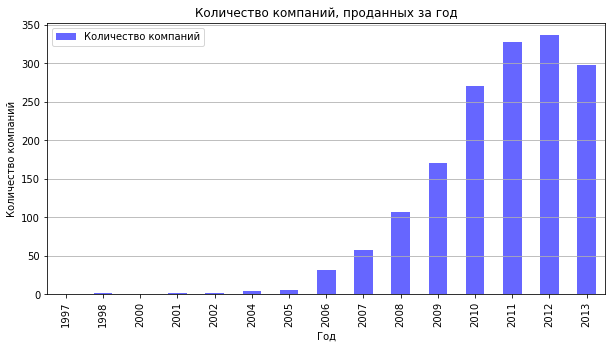

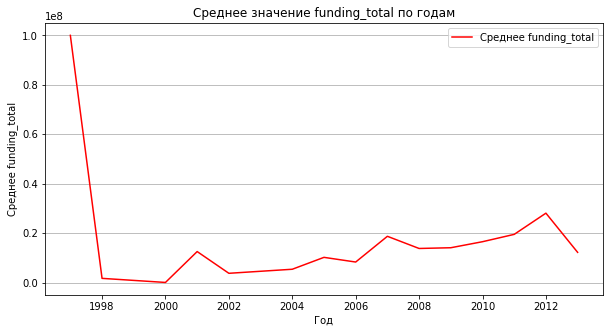

Минимальное значение funding_total: 3750
,Максимальное значение funding_total: 5699999744


In [48]:
# Группируем данные по годам и рассчитываем количество компаний и среднее funding_total
companies_stats = relevant_companies_df.groupby(relevant_companies_df['acquired_at'].dt.year).agg(
    count_companies=('acquired_at', 'size'),
    average_funding=('funding_total', 'mean')
)

# Преобразуем индекс в целочисленный формат
companies_stats.index = companies_stats.index.astype(int)
companies_stats['average_funding'] = companies_stats['average_funding'].astype(int)


# Строим первый график для количества компаний
plt.figure(figsize=(10, 5))
companies_stats['count_companies'].plot(kind='bar', color='blue', alpha=0.6, label='Количество компаний')
plt.title('Количество компаний, проданных за год')
plt.xlabel('Год')
plt.ylabel('Количество компаний')
plt.grid(axis='y')
plt.legend()
plt.show()

# Строим второй график для среднего funding_total
plt.figure(figsize=(10, 5))
companies_stats['average_funding'].plot(color='red', label='Среднее funding_total')
plt.title('Среднее значение funding_total по годам')
plt.xlabel('Год')
plt.ylabel('Среднее funding_total')
plt.grid(axis='y')
plt.legend()
plt.show()

# Проверяем выбивающееся значение для 1997 года от всех данных
min_funding = relevant_companies_df['funding_total'].min()
max_funding = relevant_companies_df['funding_total'].max()

print(f"Минимальное значение funding_total: {min_funding}")
print(f"Максимальное значение funding_total: {max_funding}")


При этом, каждый год таких компаний становится все больше, что нормально. А вот в 1997 году - размера финансирования компании выглядит аномально. Но это значение появилось из-за того, что в том году было всего 1 финансовая операция покупки, и само значение в 100млн не является максимальным, поэтому не исключаем данные за этот год перед дальнейшим рассчетом.

Оценим аналитически верхнюю и нижнюю границу выбросов для размера финансирования `funding_total` среди полученных компаний.

In [49]:
print(relevant_companies_df['funding_total'].describe().to_string(float_format='{:.2f}'.format))

# Рассчитываем квартили
Q1 = relevant_companies_df['funding_total'].quantile(0.25)
Q3 = relevant_companies_df['funding_total'].quantile(0.75)

# Вычисляем IQR
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим процентили, соответствующие границам
lower_percentile = relevant_companies_df['funding_total'].rank(pct=True).min()
lower_percentile = round(lower_percentile, 5)
upper_percentile = relevant_companies_df['funding_total'].rank(pct=True).max()

print(f"Нижняя граница выбросов: {lower_bound}, соответствует процентилю: {lower_percentile}")
print(f"Верхняя граница выбросов: {upper_bound}, соответствует процентилю: {upper_percentile}")

count         1618.00
,mean      18152961.79
,std      144503021.25
,min           3750.00
,25%        2000000.00
,50%        6000000.00
,75%       15500000.00
,max     5699999744.00
,Нижняя граница выбросов: -18250000.0, соответствует процентилю: 0.00062
,Верхняя граница выбросов: 35750000.0, соответствует процентилю: 1.0


Отрицательное значение нижней границы выбросов означает, что данные в столбце funding_total имеется большой разброс, используя интерквартильный размах и получилось экстремально низкое значение относительно первого квартиля.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясним, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [50]:
# Фильтруем данные по стоимости покупки и наличию финансирования
startup_chek_df = acquisition_company_df.loc[
     (acquisition_company_df['price_amount'] != 0) & 
     (acquisition_company_df['price_amount'] != 1)
]

# Настроим визуальную состовляющую
startup_chek_df['investment_rounds'] = startup_chek_df['investment_rounds'].astype(int)
startup_chek_df['funding_rounds'] = startup_chek_df['funding_rounds'].astype(int)
startup_chek_df['funding_total'] = startup_chek_df['funding_total'].astype(int)
startup_chek_df['funding_milestones'] = startup_chek_df['funding_milestones'].astype(int)
startup_chek_df = startup_chek_df.reset_index(drop=True)

display(startup_chek_df)
print(startup_chek_df['price_amount'].describe().to_string(float_format='{:.2f}'.format))

,company_id,company_name,category,status,investment_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,funding_milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10,Flektor,games_video,acquired,NaT,flektor.com,NaN,USA,0,0,0,0,1,11,10,NaN,20000000,2007-05-30
1,1001,FriendFeed,web,acquired,2007-10-01,friendfeed.com,friendfeed,USA,0,1,5000000,3,1901,5,1001,cash_and_stock,47500000,2009-08-10
2,1007,Rupture,games_video,acquired,NaT,rupture.com,rupture,USA,0,1,3000000,2,2186,851,1007,cash,15000000,2008-05-08
3,101519,Vidacare,hardware,acquired,NaT,vidacare.com,NaN,USA,0,1,274999,0,10214,65984,101519,NaN,262500000,2013-10-29
4,10158,StudioNow,photo_video,acquired,2007-01-01,studionow.com,NaN,USA,0,3,15286400,1,2923,351,10158,cash_and_stock,36500000,2010-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,9949,PPTV,games_video,acquired,2004-01-01,pptv.com,NaN,CHN,0,4,286500000,2,9692,267149,9949,NaN,400000000,2013-09-25
2466,99685,Symbyo Dental,biotech,acquired,2009-06-01,symbyodental.com,NaN,NaN,0,1,500000,1,7240,161312,99685,stock,4800000,2011-08-01
2467,997,Zimbra,enterprise,acquired,2003-01-01,zimbra.com,zimbra,USA,0,1,14500000,3,85,29,997,cash,350000000,2007-09-01
2468,999,buddystumbler,web,acquired,2007-01-01,buddystumbler.com,NaN,USA,0,0,0,1,1763,4447,999,NaN,113000,2008-07-09


count            2470.00
,mean       1497792989.66
,std       52336127704.48
,min                11.00
,25%          12925000.00
,50%          56450000.00
,75%         265000000.00
,max     2600000000000.00


Для получившихся 2470 компаний в 37 категорий которые не были куплены "забесплатно" все еще есть выбросы в стоимости покупки.

Исключим выбросы по методу IQR, но т.к. нижняя граница получится меньше нуля, то нижней границей обозначим 25й перцентиль.

Далее сгруппируем данные по категориям и определим среднее значение и стандартное отклонение для стоимости покупки компаний в категории. Полученные данные отсортируем по убыванию и назначим для каждой категории ранг в соответсвии с индексом. Повторно сортируем и выводим ТОП-10 категорий стартапов привлекательных для инвесторов.

In [51]:
# Рассчитываем IQR для всего набора данных
Q1 = startup_chek_df['price_amount'].quantile(0.25)
Q3 = startup_chek_df['price_amount'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаляем выбросы
filtered_startup_chek_df = startup_chek_df[(startup_chek_df['price_amount'] > Q1) & (startup_chek_df['price_amount'] < upper_bound)]

# Группируем данные по категориям и рассчитываем среднее и стандартное отклонение
grouped_by_category = filtered_startup_chek_df.groupby('category')
stats_by_category = grouped_by_category['price_amount'].agg(['mean', 'std'])
stats_by_category['mean'] = stats_by_category['mean'].astype(int)
stats_by_category['std'] = stats_by_category['std'].astype(float)

# Сортируем по среднему значению по убыванию
mean_sorted = stats_by_category.sort_values(by='mean', ascending=False)

# Сортируем по стандартному отклонению по убыванию
std_sorted = stats_by_category.sort_values(by='std', ascending=False)

In [52]:
# Создаем словарь для хранения рангов каждой категории
ranks = {}

# Проходим по каждой таблице и присваиваем ранги
for i, category in enumerate(mean_sorted.index):
    ranks[category] = ranks.get(category, 0) + i + 1

for i, category in enumerate(std_sorted.index):
    ranks[category] = ranks.get(category, 0) + i + 1

# Сортируем категории по сумме рангов
sorted_ranks = sorted(ranks.items(), key=lambda x: x[1])

# Выбираем "топ-10" категорий
top_10_categories = [category[0] for category in sorted_ranks[:7]]

# Добавляем top3 категории из mean_sorted в начало списка
top_10_categories.insert(0, 'nanotech')
top_10_categories.insert(1, 'music')
top_10_categories.insert(2, 'sports')

display("ТОП-10 категорий стартапов:", top_10_categories)


'ТОП-10 категорий стартапов:'

['nanotech',
 'music',
 'sports',
 'hospitality',
 'manufacturing',
 'biotech',
 'ecommerce',
 'finance',
 'security',
 'public_relations']

ТОП-10 категории - категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен. Составлен из:
- ТОП-3 по типично высокими ценами
- ТОП-3 с наибольшим разбросом цен за стартап
- и ТОП-4 из оставшихся категорий с наивысшим показателем сразу по двум предудыщим ТОПам.



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделаем выводы.

Исследуем значения столбца `funding_rounds` и `status` для компаний из ТОП-10 категорий стартапа.

In [53]:
# Создаем новый датафрейм, выбирая строки, где category есть в top_10_categories
filtered_top_categories_df = filtered_company_df[filtered_company_df['category'].isin(top_10_categories)]

# Получаем уникальные значения и сортируем их
unique_status = filtered_top_categories_df['status'].unique()
unique_funding_rounds = sorted(filtered_top_categories_df['funding_rounds'].unique())
unique_funding_rounds = np.array(unique_funding_rounds).astype(int)

print("Уникальные значения status:", unique_status)
print("Уникальные значения funding_rounds:", unique_funding_rounds)

Уникальные значения status: ['operating' 'acquired' 'closed' 'ipo']
,Уникальные значения funding_rounds: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


Определим типичное значение количества раундов для каждого возможного статуса стартапа. И построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы `status`

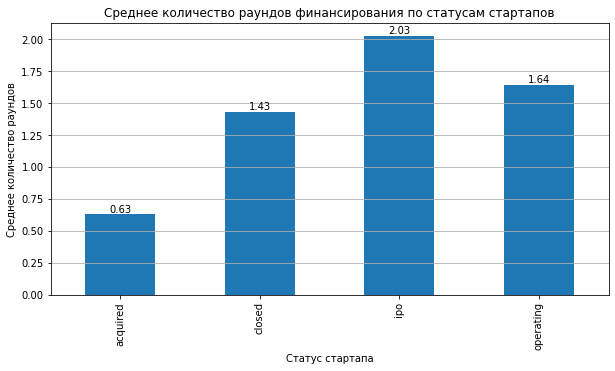

In [54]:
# Группируем данные по статусу и рассчитываем среднее количество раундов
average_funding_rounds = filtered_top_categories_df.groupby('status')['funding_rounds'].mean()

# Строим график
plt.figure(figsize=(10, 5))
average_funding_rounds.plot(kind='bar')
plt.title('Среднее количество раундов финансирования по статусам стартапов')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.grid(axis='y')

# Отображаем значения на графике
for i, v in enumerate(average_funding_rounds):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

Получили следующие данные:
- компании со статусом `acquired` проходили в среднем `0.63` раундов финансирования, это говорит о том, что большинство этих компаний привлекли инвестиции всего один раз или даже не привлекали их вовсе перед тем, как были приобретены.
- для компаний с `closed` - `1.43` раундов финансирования, что может значить следующее: компании активно искали внешнее финансирование для развития, но в итоге не смогли продолжить свою работу по каким-то причинам даже не смотря на то, что более одного разапривлекали финансирование.
- `operating` - `1.64` раундов финансирования - таким компаниям периодически требуется внешнее финансирование для поддержания операционной деятельности, расширения бизнеса или развития.
- и `ipo` - `2.03` раундов финансирования (это может указывать на среднее количество раундов финансирования до проведения IPO)



## Шаг 4. Итоговый вывод и рекомендации

Опишем, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Выполнено исследование на основе исторических данных финансовой компании, которая предоставляет льготные займы стартапам.

В процессе предобработки данных получили следующее:
- `данные представлены в дотаточном объеме` для ответов на вопросы заказчика и выполнения всех поставленных задач. Однако, не смотря на большое количество пропусков в данных которыми являлись больше информационные составляющие, основная проблема для расчетов была следующей - "огромные выбросы значений финансирования и стоимостей". Для решения этой проблемы применялись методы работ с выбросами.
- для объединения таблиц использовался предобработанный столбец `company_id`, также было принято решение не использовать столбец `network_username` для датафреймов`company_and_rounds_df`, `people_df` и `fund_df`, т.к. это привело бы к искажению данных (`максимальный процент пересечения 1.86%`).
- из полученных `данных об образовании сотрудникв` можно предположить следующее: большое количество компаний состоящих из 1 сотрудника основывают люди без образования, об этом говорит `значение полноты информации` (%), где компании `из 1 человека (59%)` имеют показатель в 2 раза хуже, чем компании где работает `больше 1 сотрудника (23%)`.
- в соответсвии с гипотезой, что "таблицы раньше хранились иначе, более удобным для исследования образом" из `company_and_rounds_df` были созданы `company_df` и `funding_df` с соответствующей информацией о компаниях, финансировании и инвестированиях.
- `типичный размер средств`, собранных в рамках одного раунда, был `максимален в 2005 году`, с 2005-2012 значение постоянно уменьшалось, но `на момент 2013 года имеет точку роста`.


Выводы и рекомендации:
- создан новый датафрейм `filtered_company_df` с компаниями `заинтересованными к покупке или продаже компании`. Данные так же удовлетворяют изначальному требованию о "удобности для исследования".
- самые `большие вложения` были направлены на `web-разработки` (web). Такие могут указывать на `высокий спрос на цифровые решения и развитие онлайн-сервисов`.
- `типичное финансирование для одной компании` - `1 500 000` - это значение может быть использовано как `ориентир для оценки` того, `сколько средств необходимо для запуска или масштабирования проекта` в определённой отрасли.
- `выбивающийся размер финансирования`: `меньше 100 000` небольшие инвестиции, которые направляются на `ранние стадии` развития стартапов и `больше 10 000 000` крупные объёмы финансирования могут идти более зрелым компаниям или `проектам с высоким потенциалом роста`, такие значения встречаются реже.
- каждый год увеличивается количество компаний, которые были проданы за ноль или за один доллар. Причины не определены, это может быть признаком различных экономических тенденций или специфических ситуаций.
- `ТОП-10` категорий `стартапов` с типично высокими ценами покупки стартапов и значительным разбросом цен, которые могут быть привлекательны для крупных инвесторов: `nanotech`, `music`, `sports`, `hospitality`, `manufacturing`, `biotech`, `ecommerce`, `finance`, `security`, `public_relations`. Многие из перечисленных категорий (например, нанотехнологии и биотехнологии) связаны с передовыми технологиями и научными разработками, что делает их особенно привлекательными для инвесторов, ищущих новые возможности. В этих отраслях существует множество различных подходов к ведению бизнеса, что создаёт широкий спектр возможностей для инвестиций и может объяснить значительный разброс цен на стартапы.
- типичное значение количества раундов для каждого статуса: `acquired` - `0.63`, `closed` - `1.43`, `operating` - `1.64`, `ipo` - `2.03`. Исходя из полученных значений можно подвести, что компании с разными статусами в среднем привлекают различное количество раундов финансирования. А это уже становится дополнительным инструментом анализа для прогнозирования, определения тенденций.

Эта информация служит фундаментом для создания бизнес-модели и принятия взвешенных решений о приобретении, развитии и потенциальной продаже перспективных стартапов. Полученные выводы и рекомендации относительно финансирования в различных секторах и статуса компаний являются важным ресурсом для стратегического планирования и инвестирования.